<a href="https://colab.research.google.com/github/alimoorreza/CS167-notes/blob/main/Day08_Metrics_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day08
## Metrics and Testing

#### CS167: Machine Learning, Spring 2023

Tuesday, September 26, 2023

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs167_fall23/cs167_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_fall23/cs167_syllabus_fall23.pdf)

# Admin Stuff

You should be working on:
- Heads up that **Quiz #1 is due tonight, Tuesday 2/21 by 11:59pm**.
    - To be completed individually
    - Only one chance to hit 'submit'
    - Cite any materials that you use outside of class
- [Notebook #3](https://github.com/alimoorreza/CS167-Notebook-3/tree/main)
    - **Extension**: now due next Saturday 9/30/23 by 11:59pm.

# ✨ New Material

In [ ]:
#run this cell if you're using Colab:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the data:
#make sure the path on the line below corresponds to the path where you put your dataset.
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/cs167_fall23/datasets/vehicles.csv')
pd.set_option('display.max_columns', 100)
iris = pd.read_csv('/content/drive/MyDrive/cs167_fall23/datasets/irisData.csv')



<ipython-input-3-4bfc151bc0e9>:5: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/cs167_fall23/datasets/vehicles.csv')


# How do we know if our model is a 'good' model?

We want to know how good our models are at making predictions... how can we test it?

Examples:
- what k-value should we use in knn algorithm?
- what is the effect on accuracy if I normalize the data?
- Should I use a weighted knn algorithm or a normal knn?

## Evaluation of Machine Learning Algorithms:

We want to know how good our model is at making predictions. How can we test it?

__Option 1:__ Deploy the model in a live setting and see how it does on new examples.

__Option 2:__ Run each of our training examples through the model and see how many it gets correct

__Option 3:__ Cross-Validation - set aside some of your training examples to be used for testing.
- don't use testing examples when you train the model, only the rest that were left over. Why?

## Cross-Validation

Don't train the model on the testing data!

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day04_cross_validation.png" width=600/>
</div>

## Cross-Validation Code:

A good rule of thumb is that we like to train our model with 80% of the given data examples (training set), and test it on 20% of the given data examples (training set).

Splitting datasets into training and testing sets with a Pandas DataFrame:

In [ ]:
import pandas as pd
import numpy as np


#shuffle the iris "sampling" the full set in random order
shuffled_data = iris.sample(frac=1, random_state=41)

# set up training and testing set
test_data = shuffled_data.iloc[0:20] #test on the first 20 rows of shuffled
train_data = shuffled_data.iloc[20:] #train on the rest
train_data.shape

(130, 5)

## Cross-Validation Metrics:

When doing cross-validation, how do we tell how well our model performed?

How can we measure it?

- depends on the task and what we want to know.

### Classification metrics are different than regression metrics

## Classification Metrics: `Accuracy`

__Accuracy__: The fraction of test examples your model predicted correctly

*Example*: 17 out of 20 = 0.85 accuracy

### Issues with accuracy:
- Suppose that a blood test for cancer has 99% accuracy
    - *can we safely assume this is a really good test?*
        -  If the dataset is *unbalanced*, accuracy is not a reliable metric for the real performance of a classifier because it will yield misleading results.
        - __Example__: Most people don’t have cancer.

    - Beware of what your metrics don't tell you.

- What about __false negatives__ and __false positives__?
    - __false negative__: a test result which incorrectly indicates that a particular condition or attribute is absent
    - __false positives__: a test result which incorrectly indicates that a particular condition or attribute is present

## Classification Metrics: `Confusion Matrix`

__confusion matrix__: A specific table layout that allows the visualiztion of the performance of an algorithm. Each row represents instances in an actual class while each column represents the instances in a predicted class.
- It makes it easy to see where your model is confusing the predicted and actual results


<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day04_iris_confusionmatrix.png" width=600/>
</div>


<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day04_pretty_confusionmatrix.png" width=600/>
</div>

## Confusion Matrix Exercise:

Given the following confusion matrix:
- how many false positive?
- how many false negatives
- what is the accuracy?


<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day04_confusionmatrix_ex.png" width=400/>
</div>


# Classification v Regression:

What's the difference?

The output variable in __regression__ is numerical (or continuous).

The output variable in __classification__ is categorical (or discrete).

### Is accuracy a good metric for regression? Why or why not?

# Regression Metrics: `Mean Absolute Error (MAE)`

__Mean Absolute Error (MAE)__: the average difference between the actual and predicted target values.

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day04_mae.png"/>
</div>


<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day04_mae_calc.png"/>
</div>


## Regression Metrics: `Mean Squared Error (MSE)`

__Mean Squared Error__: The average squared difference between the actual and predicted targets.

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day04_mse.png"/>
</div>


<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day04_mse_calc.png"/>
</div>


## MAE v MSE:

What effect does the squaring have on the error measurements?

Can you think of any scenarios where it might be better to use `MAE` over `MSE` or vis versa?

## Let's see how accurate our kNN model is:

Start with loading the data and setting up some cross-validation:

In [ ]:
import pandas
data = pd.read_csv('/content/drive/MyDrive/cs167_fall23/datasets/irisData.csv') #change this line to point to your data

#shuffle the data - "sampling" the full set in random order
shuffled_data = data.sample(frac=1, random_state=41)

#cross-validation
#use the first 20 rows in the shuffled set as testing data #train with the rest
test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]

Then, let's bring in our `kNN()` function--here I'm calling it `classify_kNN()` becuase it uses `mode()` to return the prediction which only works for classifcation.

In [ ]:
def classify_kNN(new_example,train_data,k):
    #getting a copy of the training set just so we don't
    #mess up the original
    train_data_copy = train_data.copy()
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['petal length']-train_data_copy['petal length'])**2
        +(new_example['sepal length']-train_data_copy['sepal length'])**2
        +(new_example['petal width']-train_data_copy['petal width'])**2
        +(new_example['sepal width']-train_data_copy['sepal width'])**2)

    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #mode to get most common thing in the first k examples in the sorted dataframe
    #iloc to get the actual string, mode will return the string inside of a pandas Series
    prediction = sorted_data.iloc[0:k]['species'].mode().iloc[0]
    return prediction

Next, let's write a function for accuracy that will compare the actual species with the predicted species and return the percent we got correct.

In [ ]:
def accuracy(actual,predicted):
    #get the series comparing the two series
    compared = actual.equals(predicted)
    correct_predictions = compared[ compared == True ]
    num_correct = len(correct_predictions)
    frac_correct = num_correct/len(actual)
    return frac_correct

Now, let's write a function `classify_all_kNN(test_data, train_data,k):` that:
- goes through each example in the `test_data`, and gets the prediction using our `kNN()` function
- It will return a pandas `Series` that has the predictions for each row in `test_data`.

It should look something like this:

In [ ]:
def classify_all_kNN(test_data,train_data,k):
    #apply the classify_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of
    #the individual results.

    results = []

    for i in range(len(test_data)):
        prediction = classify_kNN(test_data.iloc[i], train_data,k)
        results.append(prediction)

    return pandas.Series(results)

Now, let's pull it all together and see how our kNN does:

In [ ]:
import numpy
from sklearn.metrics import accuracy_score

predictions5NN = classify_all_kNN(test_data,train_data,11)


#this will print out our predictions so we can see:
print('ACTUAL\t\tPREDICTIONS')
for i in range(20):
    print(test_data['species'].iloc[i], "  ", predictions5NN.iloc[i] )

#acc = accuracy(test_data['species'],predictions5NN)

acc = accuracy_score(test_data['species'], predictions5NN)
print("accuracy:", acc)

ACTUAL		PREDICTIONS
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-virginica    Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-virginica    Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-setosa    Iris-setosa
Iris-setosa    Iris-setosa
Iris-versicolor    Iris-versicolor
Iris-setosa    Iris-setosa
Iris-virginica    Iris-virginica
Iris-setosa    Iris-setosa
Iris-versicolor    Iris-virginica
Iris-setosa    Iris-setosa
Iris-setosa    Iris-setosa
accuracy: 0.95


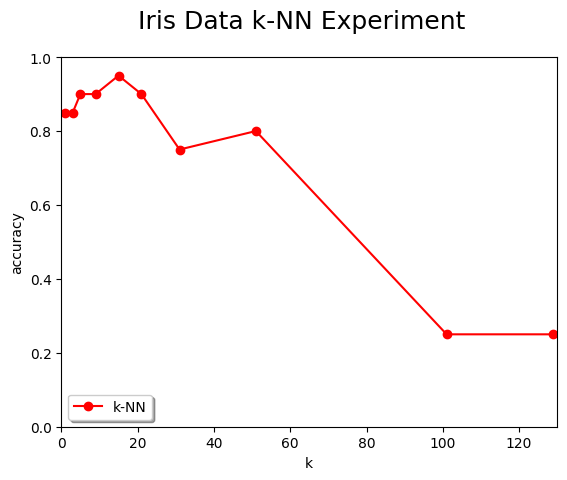

In [ ]:
import matplotlib.pyplot as plt
import pandas

#reload the data
data = pd.read_csv('/content/drive/MyDrive/cs167_fall23/datasets/irisData.csv') #change this line to point to your data

shuffled_data = data.sample(frac=1, random_state = 41)

test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]


k_vals = [1,3,5,9,15,21,31,51,101,129]
kNN_accuracies = []

for k in k_vals:
    predictions = classify_all_kNN(test_data,train_data,k)
    current_accuracy = accuracy_score(test_data['species'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Iris Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,1])

plt.show()

## 💬 Group Exercise:

Write a function that takes in two Series and returns the Mean Absolute Error:

__Mean Absolute Error (MAE)__: the average difference between the actual and predicted target values.

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day04_mae.png", width=400/>
</div>

> How can you test your code to make sure it's working correctly?


In [ ]:
import numpy as np
np.absolute(-19)

19

In [ ]:
def mae(actual, predicted):
    """
    takes in two Series of the same length, and returns the mean absolute error between the two series
    Hint: It's a lot simpler than you may think.
    """
    #your code here


    return mean_absolute_error
